In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import jarque_bera
from sklearn.metrics import  mean_squared_error, mean_absolute_percentage_error
from sklearn.neural_network import MLPRegressor


In [3]:

# file_path ='D:\DASC 6510 Time Series\Project\Bitcoin Historical Data.csv' # 替换为您的文件路径
# data = pd.read_csv(file_path)

# # 确保 Vol. 列是字符串类型
# data['Vol.'] = data['Vol.'].astype(str)

# # 定义转换函数
# def convert_to_k(value):
#     if value.endswith('K'):  # 如果以 K 结尾
#         return float(value.replace('K', ''))
#     elif value.endswith('M'):  # 如果以 M 结尾
#         return float(value.replace('M', '')) * 1000
#     elif value.endswith('B'):  # 如果以 B 结尾
#         return float(value.replace('B', '')) * 1000000


# # 应用转换函数
# data['Vol.'] = data['Vol.'].apply(convert_to_k)

# # 保存处理后的文件
# output_path = 'D:\DASC 6510 Time Series\Project\Bitcoin Historical Data.csv'  # 替换为输出路径
# data.to_csv(output_path, index=False)

# print("处理完成，已保存为", 'D:\DASC 6510 Time Series\Project\Bitcoin Historical Data.csv')


处理完成，已保存为 D:\DASC 6510 Time Series\Project\Bitcoin Historical Data.csv


In [15]:
data = pd.read_csv('D:\DASC 6510 Time Series\Project\Bitcoin Historical Data.csv', parse_dates=['Date'], index_col='Date')

data = data.sort_index()

data['day'] = range(1, len(data) + 1)

# data = data.set_index('day')
# data['Price'] = pd.to_numeric(data['Price'], errors='coerce')


print(data.head(15))

             Price    Open    High    Low   Vol.  Change %  day
Date                                                           
2014-01-01   815.9   805.9   829.9  771.0  10.76      1.24    1
2014-01-02   856.9   815.9   886.2  810.5  12.81      5.02    2
2014-01-03   884.3   856.9   888.2  839.4   9.71      3.19    3
2014-01-04   924.7   884.3   932.2  848.3  14.24      4.57    4
2014-01-05  1014.7   924.7  1029.9  911.4  21.37      9.74    5
2014-01-06  1012.7  1014.7  1093.4  964.7  23.08     -0.21    6
2014-01-07   879.9  1012.7  1044.0  879.8  22.67    -13.11    7
2014-01-08   938.8   879.9   966.9  858.9  14.10      6.70    8
2014-01-09   937.0   938.8   964.6  866.5  14.42     -0.20    9
2014-01-10   957.8   937.0   964.8  905.9   6.35      2.22   10
2014-01-11  1005.3   957.8  1010.8  935.0  11.18      4.97   11
2014-01-12   939.8  1005.3  1022.7  922.1   9.93     -6.52   12
2014-01-13   922.9   939.8   949.2  879.9  10.13     -1.80   13
2014-01-14   919.3   922.9   942.5  904.

In [16]:
train_data = data.loc['2019-01-01':'2023-12-31']
test_data = data.loc['2024-01-01':'2024-11-07']

print(f"Training data: {train_data.shape[0]} rows")
print(f"Testing data: {test_data.shape[0]} rows")

Training data: 1826 rows
Testing data: 312 rows


In [17]:
print(test_data.head(15))


              Price     Open     High      Low    Vol.  Change %   day
Date                                                                  
2024-01-01  44183.4  42272.5  44187.0  42196.7   36.30      4.52  3653
2024-01-02  44943.7  44182.9  45885.4  44166.0   97.84      1.72  3654
2024-01-03  42836.1  44943.7  45492.7  40888.3  117.65     -4.69  3655
2024-01-04  44157.0  42836.1  44744.5  42632.8   68.05      3.08  3656
2024-01-05  44156.9  44163.0  44312.1  42629.0   68.07      0.00  3657
2024-01-06  43967.9  44156.6  44203.2  43424.0   24.26     -0.43  3658
2024-01-07  43927.3  43973.5  44481.2  43627.9   29.53     -0.09  3659
2024-01-08  46962.2  43934.2  47196.7  43251.0  103.09      6.91  3660
2024-01-09  46129.0  46959.2  47880.1  45333.9  100.09     -1.77  3661
2024-01-10  46629.3  46112.0  47654.3  44403.6  131.48      1.08  3662
2024-01-11  46348.2  46629.3  48923.7  45651.8  131.04     -0.60  3663
2024-01-12  42835.9  46348.1  46503.2  41857.9  136.92     -7.58  3664
2024-0

In [18]:
train_data['Price'] = pd.to_numeric(train_data['Price'], errors='coerce')
test_data['Price'] = pd.to_numeric(test_data['Price'], errors='coerce')

C:\Users\currahee\OneDrive/ipykernel_21720/1975634144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Price'] = pd.to_numeric(train_data['Price'], errors='coerce')
C:\Users\currahee\OneDrive/ipykernel_21720/1975634144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Price'] = pd.to_numeric(test_data['Price'], errors='coerce')


In [19]:
print(test_data.head(15))

              Price     Open     High      Low    Vol.  Change %   day
Date                                                                  
2024-01-01  44183.4  42272.5  44187.0  42196.7   36.30      4.52  3653
2024-01-02  44943.7  44182.9  45885.4  44166.0   97.84      1.72  3654
2024-01-03  42836.1  44943.7  45492.7  40888.3  117.65     -4.69  3655
2024-01-04  44157.0  42836.1  44744.5  42632.8   68.05      3.08  3656
2024-01-05  44156.9  44163.0  44312.1  42629.0   68.07      0.00  3657
2024-01-06  43967.9  44156.6  44203.2  43424.0   24.26     -0.43  3658
2024-01-07  43927.3  43973.5  44481.2  43627.9   29.53     -0.09  3659
2024-01-08  46962.2  43934.2  47196.7  43251.0  103.09      6.91  3660
2024-01-09  46129.0  46959.2  47880.1  45333.9  100.09     -1.77  3661
2024-01-10  46629.3  46112.0  47654.3  44403.6  131.48      1.08  3662
2024-01-11  46348.2  46629.3  48923.7  45651.8  131.04     -0.60  3663
2024-01-12  42835.9  46348.1  46503.2  41857.9  136.92     -7.58  3664
2024-0

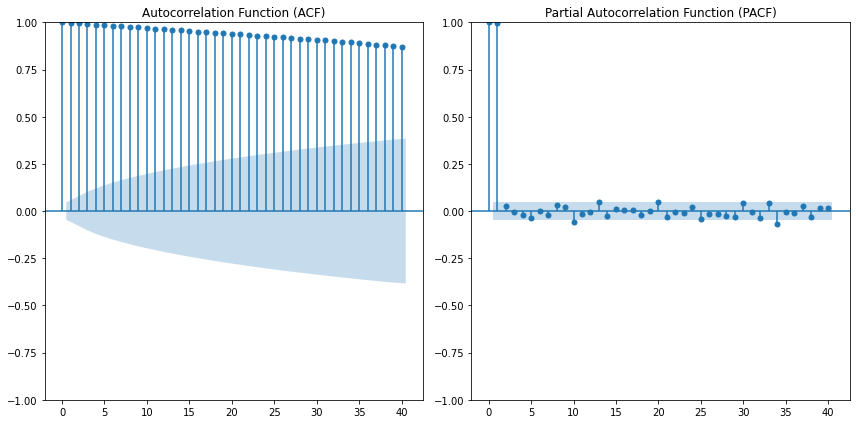

In [44]:
price_data = train_data['Price']

plt.figure(figsize=(12, 6))

# ACF 
plt.subplot(1, 2, 1)
plot_acf(price_data, lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

# PACF 
plt.subplot(1, 2, 2)
plot_pacf(price_data, lags=40, ax=plt.gca(), method='ywm')
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


C:\Users\currahee\OneDrive/ipykernel_21720/1969652279.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Open_lag1'] = data['Open'].shift(1)
C:\Users\currahee\OneDrive/ipykernel_21720/1969652279.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Vol._lag1'] = data['Vol.'].shift(1)
C:\Users\currahee\OneDrive/ipykernel_21720/1969652279.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1825
Model:               SARIMAX(1, 0, 0)   Log Likelihood              -15378.045
Date:                Fri, 29 Nov 2024   AIC                          30768.090
Time:                        12:11:46   BIC                          30801.146
Sample:                    01-02-2019   HQIC                         30780.284
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open_lag1     -0.0032      0.032     -0.099      0.921      -0.066       0.059
High_lag1      0.6232      0.029     21.754      0.000       0.567       0.679
Low_lag1       0.3748      0.020     18.925      0.0

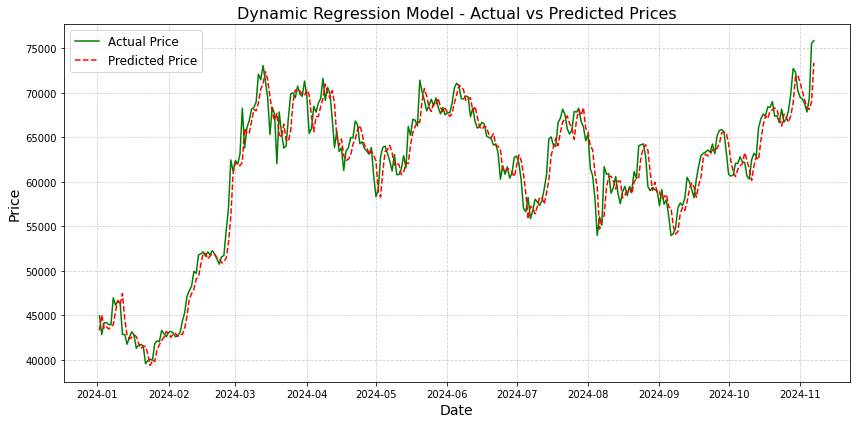

In [50]:
#Dynamic Regression

# data = pd.read_csv('D:\DASC 6510 Time Series\Project\Bitcoin Historical Data.csv', parse_dates=['Date'], index_col='Date')

# data = data.sort_index()

train_data = data.loc['2019-01-01':'2023-12-31']
test_data = data.loc['2024-01-01':'2024-11-07']

def create_lag_features(data):
    data['Open_lag1'] = data['Open'].shift(1)
    data['Vol._lag1'] = data['Vol.'].shift(1)
    data['High_lag1'] = data['High'].shift(1)
    data['Low_lag1'] = data['Low'].shift(1)
    return data

train_data = create_lag_features(train_data).dropna()
test_data = create_lag_features(test_data).dropna()

X_train = train_data[['Open_lag1', 'High_lag1', 'Low_lag1','Vol._lag1']]
# X_train = train_data[['Vol._lag1', 'High_lag1', 'Low_lag1']]
y_train = train_data['Price']
# X_test = test_data[['Open_lag1', 'High_lag1', 'Low_lag1']]
X_test = test_data[['Open_lag1', 'High_lag1', 'Low_lag1','Vol._lag1']]
y_test = test_data['Price']

# dynamaic regression model
model = SARIMAX(y_train, exog=X_train, order=(1, 0,0))  
model_fitted = model.fit(disp=False)


print(model_fitted.summary())


y_pred = model_fitted.forecast(steps=len(X_test), exog=X_test)

# EMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape:.2%}")


plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Price', color='green')
plt.plot(y_test.index, y_pred, label='Predicted Price', color='red', linestyle='--')
plt.title('Dynamic Regression Model - Actual vs Predicted Prices', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [45]:
#ARIMA Model
arima_order = (2, 0,0)
arima_model = ARIMA(train_data['Price'], order=arima_order)
arima_fitted = arima_model.fit()


print(arima_fitted.summary())


arima_forecast = arima_fitted.forecast(steps=len(test_data['Price']))

# RMSE
arima_rmse = np.sqrt(mean_squared_error(test_data['Price'], arima_forecast))
print(f"ARIMA RMSE: {arima_rmse}")
#MAPE
arima_mape = mean_absolute_percentage_error(test_data['Price'], arima_forecast) * 100
print(f"ARIMA MAPE: {arima_mape:.2f}%")

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1826
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -15281.967
Date:                Fri, 29 Nov 2024   AIC                          30571.934
Time:                        12:09:59   BIC                          30593.974
Sample:                    01-01-2019   HQIC                         30580.064
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.458e+04   1.08e+04      2.276      0.023    3411.685    4.57e+04
ar.L1          0.9602      0.016     59.834      0.000       0.929       0.992
ar.L2          0.0379      0.016      2.377      0.0

E:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [47]:

# train_prices = train_data['Price'].to_numpy()  
# test_prices = test_data['Price'].to_numpy()    

# arima_forecast = np.array(arima_forecast).flatten()

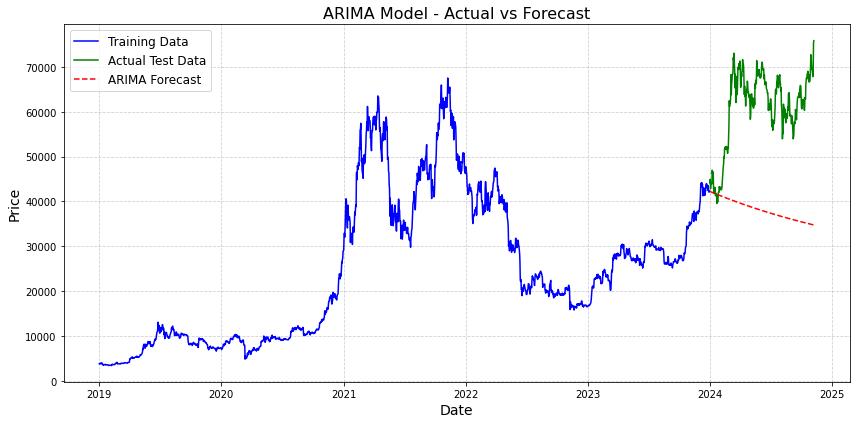

In [48]:
# plot ARIMA
plt.figure(figsize=(12, 6))

plt.plot(train_data.index, train_prices, label='Training Data', color='blue')


plt.plot(test_data.index, test_prices, label='Actual Test Data', color='green')


plt.plot(test_data.index, arima_forecast, label='ARIMA Forecast', color='red', linestyle='--')


plt.title('ARIMA Model - Actual vs Forecast', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)


plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)


plt.tight_layout()
plt.show()

In [19]:
#NNAR Model
train_data = data.loc['2019-01-01':'2023-12-31']
test_data = data.loc['2024-01-01':'2024-11-07']

y_train = train_data['Price'].values
y_test = test_data['Price'].values


def create_lag_features(data, lags=3):
    X, y = [], []
    for i in range(lags, len(data)):
        X.append(data[i - lags:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# Creating lag features
lags = 3  
X_train, y_train = create_lag_features(y_train, lags)
X_test, y_test = create_lag_features(np.concatenate((y_train[-lags:], y_test)), lags)

# NNAR 
nnar_model = MLPRegressor(hidden_layer_sizes=(10,), activation='relu', solver='adam', max_iter=500, random_state=42)
nnar_model.fit(X_train, y_train)


y_pred_train = nnar_model.predict(X_train)
y_pred_test = nnar_model.predict(X_test)

#RMSE and MAPE
# rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# mape_train = mean_absolute_percentage_error(y_train, y_pred_train) * 100  
mape_test = mean_absolute_percentage_error(y_test, y_pred_test) * 100     

print(f"Test RMSE: {rmse_test:.2f}")
print(f"Test MAPE: {mape_test:.2f}%")


Train RMSE: 1193.35
Test RMSE: 1929.56
Train MAPE: 2.80%
Test MAPE: 2.37%


E:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


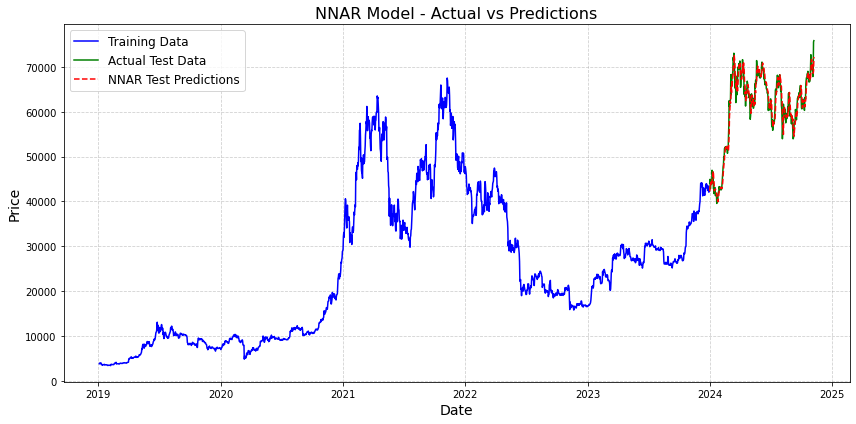

In [35]:
# plot NNAR
plt.figure(figsize=(12, 6))


plt.plot(train_data.index[lags:], y_train, label='Training Data', color='blue')
plt.plot(test_data.index[:len(y_test)], y_test, label='Actual Test Data', color='green')


# plt.plot(train_data.index[lags:], y_pred_train, label='NNAR Train Predictions', color='orange', linestyle='--')
plt.plot(test_data.index[:len(y_pred_test)], y_pred_test, label='NNAR Test Predictions', color='red', linestyle='--')


plt.title('NNAR Model - Actual vs Predictions', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)


plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)


plt.tight_layout()
plt.show()

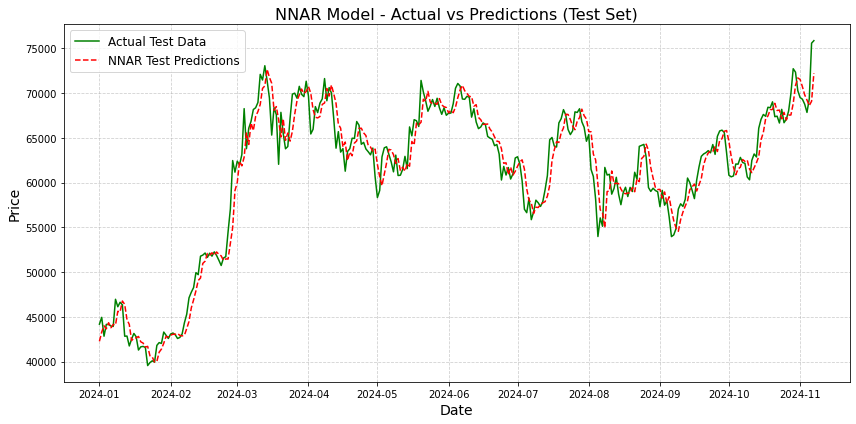

In [34]:
# plot NNAR
plt.figure(figsize=(12, 6))


plt.plot(test_data.index[:len(y_test)], y_test, label='Actual Test Data', color='green')


plt.plot(test_data.index[:len(y_pred_test)], y_pred_test, label='NNAR Test Predictions', color='red', linestyle='--')


plt.title('NNAR Model - Actual vs Predictions (Test Set)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()
